In [23]:

import numpy as np
import matplotlib.pyplot as plt

# 1. A MODEL OF THE EMBRYO MORPHOGENS

第一章其实是一份**“免责声明”**。他在告诉你：
“我知道生物体有机械受力，有复杂的细胞结构，但我现在打算把它们都当成透明的‘沙盒’。我只关心沙盒里那些会跑动（扩散）且会互相转化的‘药水’（形态发生素）。”

"I recognize the mechanical forces and complex cellular architecture, but for now, I’m treating the organism as a transparent 'sandbox'. I am only interested in the 'potions'—the morphogens—that diffuse and react within it."



 # 2. MATHEMATICAL BACKGROUND REQUIRED

（a）与（b）—— 确定波形：他先定义了复数形式的解 $A e^{bt}$，并指出实部 $\alpha$ 决定了幅度变化，虚部 $\beta$ 决定了振荡频率 。这不就是复频域分析吗？

（c）—— 定义“不稳定”：只要实部为正，系统就不稳定（起振） 。

（d）—— 寻找“主导模式”（Dominant terms）：经过足够长的时间，增益最高的那种波形会盖过其他所有噪声，占据主导地位 。这解释了为什么斑马的条纹是整齐的，而不是乱七八糟的。

（e）—— 物理约束（饱和）：明确指出“无限增长”在生物和物理世界是不存在的，模型必须在最后阶段由线性转为非线性 。

Points (a) & (b) — Waveform Determination
He defines the solution to the differential equations as $\Sigma A e^{bt}$, where the real part ($\alpha$) dictates the amplitude change and the imaginary part ($\beta$) governs the oscillation frequency. This is, in essence, Complex Frequency Domain Analysis.

(c) — Defining "Instability"
The system is classified as unstable—analogous to the "start-up" of an oscillator—if any value of $b$ has a positive real part.

(d) — Identifying "Dominant Terms"
After a sufficient lapse of time, the terms with the greatest real part (the highest gain) will overshadow all other noise components and take a dominant role in the system. This principle explains why biological patterns, such as zebra stripes, appear orderly and regular rather than chaotic.

(e) — Physical Constraints (Saturation)
He explicitly clarifies that "indefinite growth" is a physical and biological impossibility. The model must eventually transition from a linear to a non-linear regime as the initial assumptions break down—much like a circuit reaching its saturation point.

## Discrete Fourier Transform basis

The orthognoal basis summation

 $\sum_{r=1}^{N} \exp\left[\frac{2\pi i r s}{N}\right] = 0$

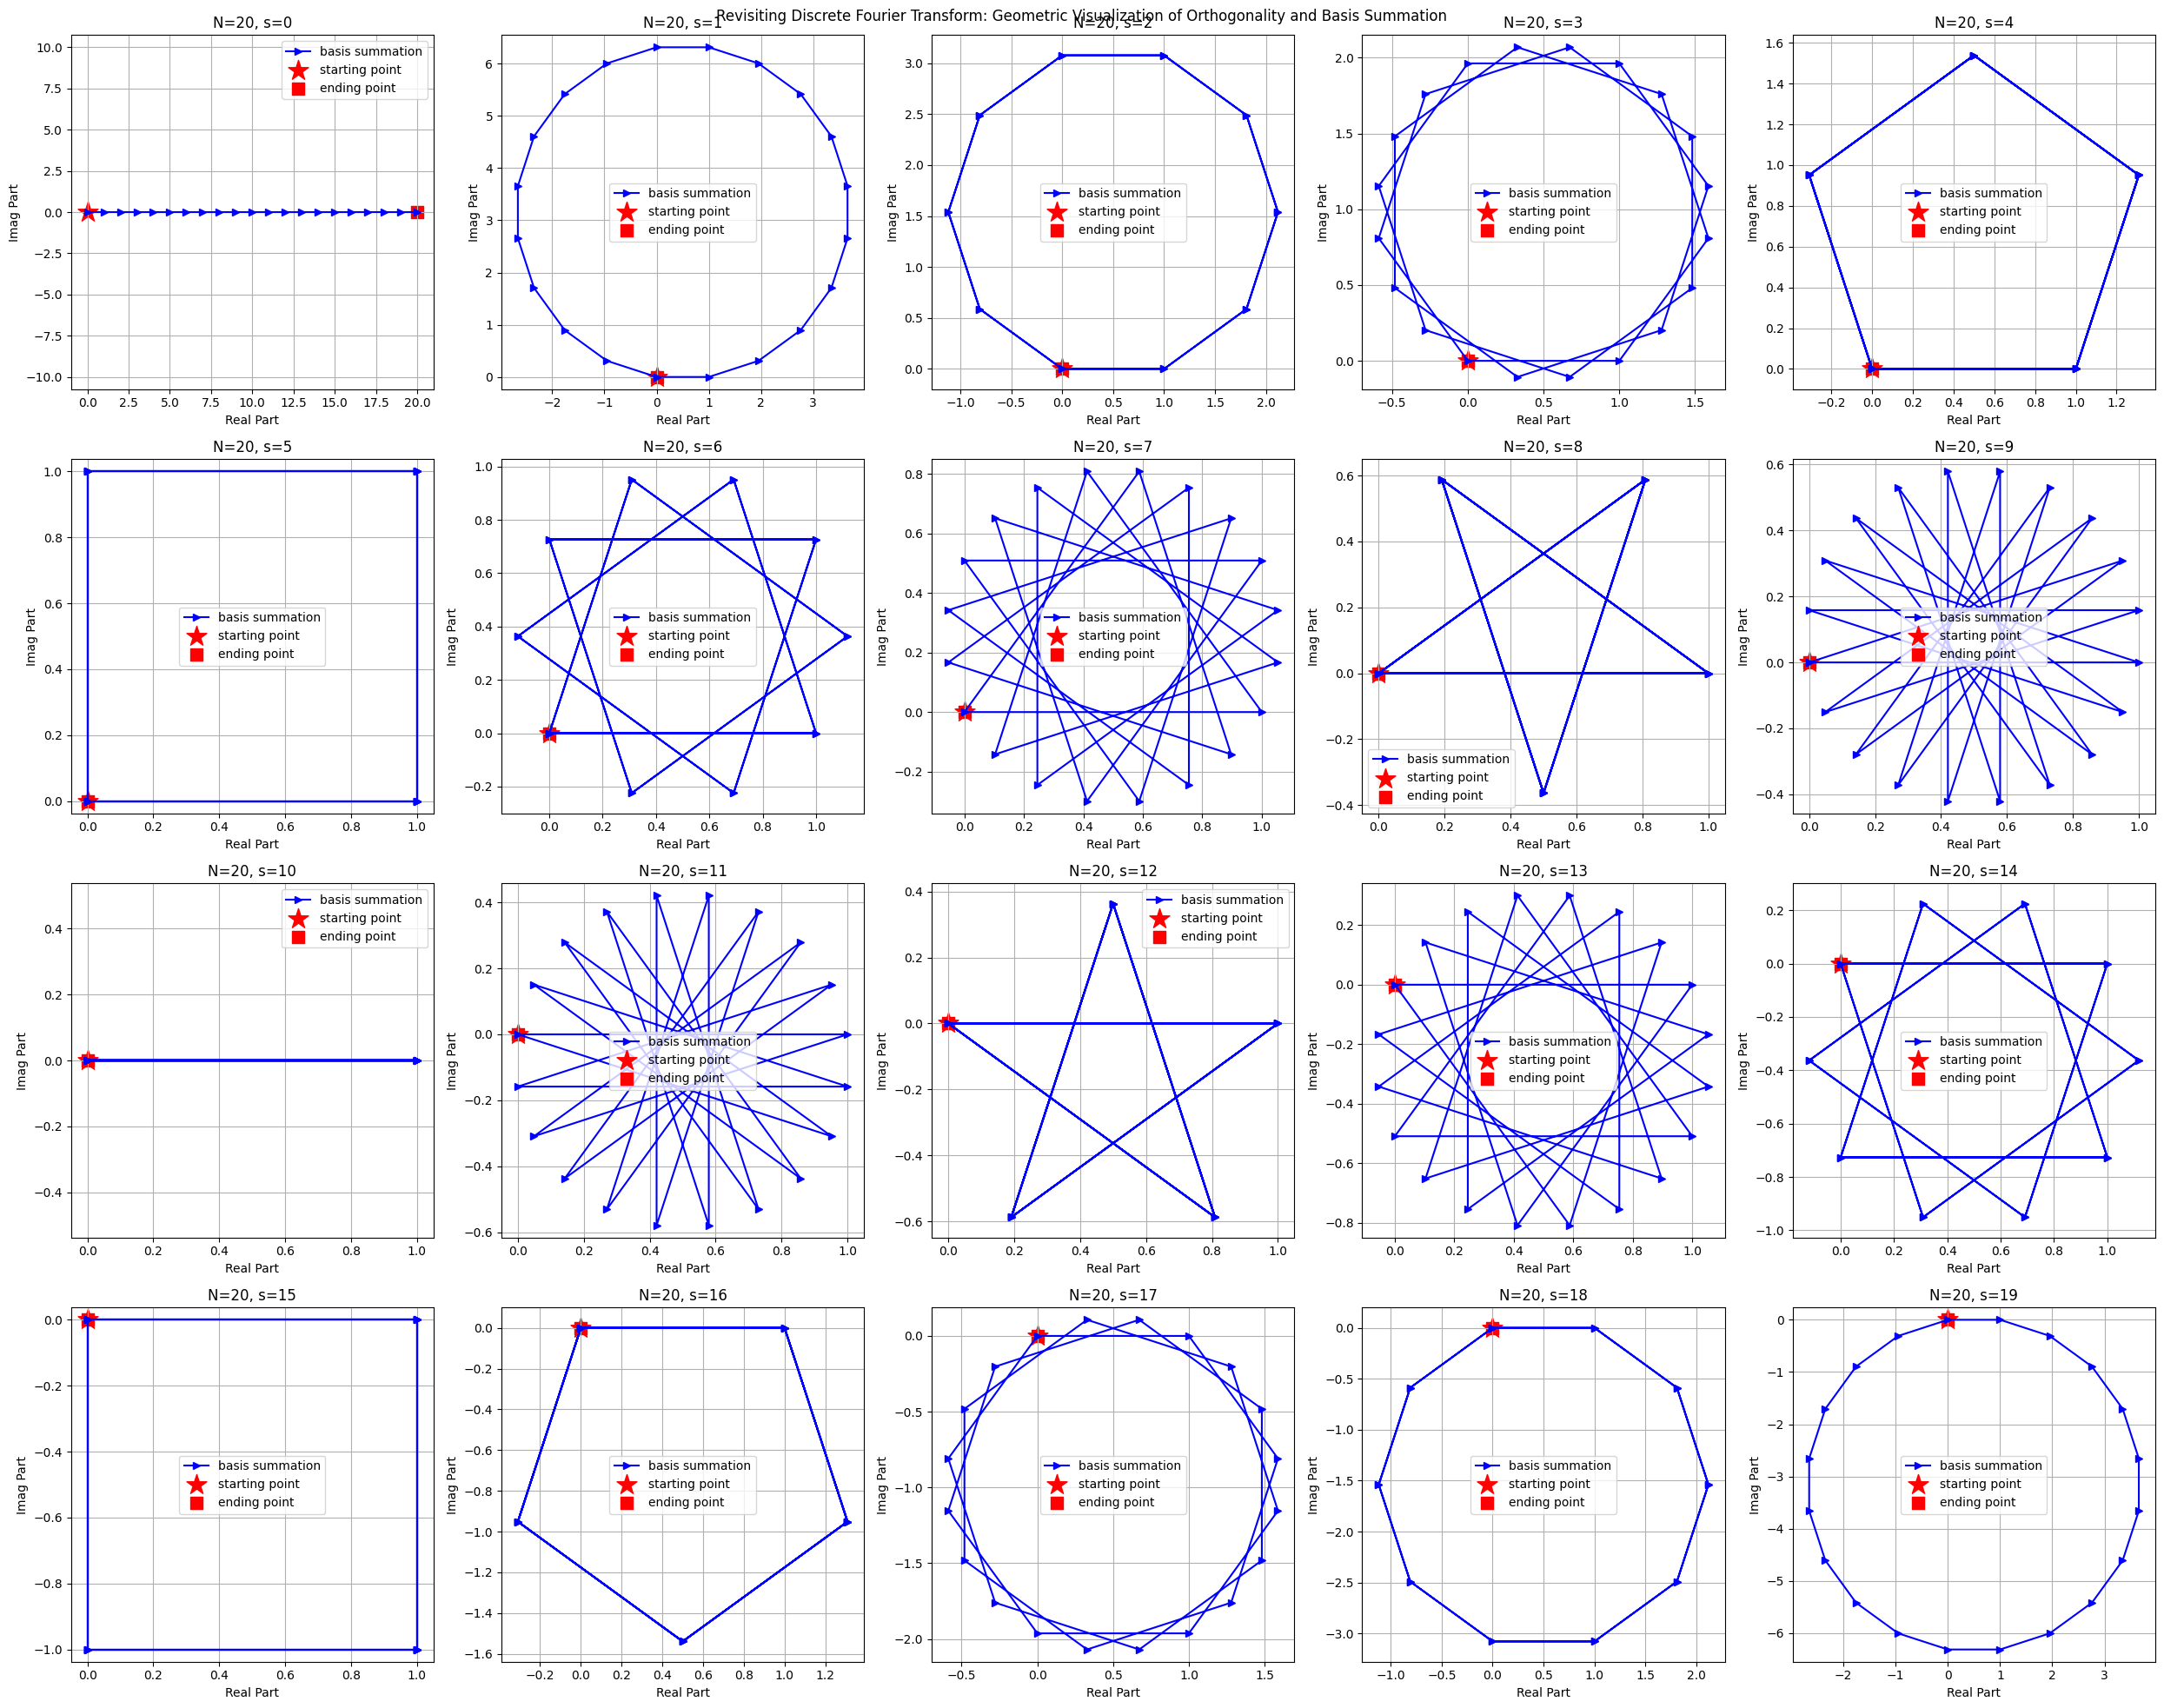

In [1]:
## Discrete Fourier transform
import numpy as np
import matplotlib.pyplot as plt

N = 20
s = 6  # 尝试改变 s 的值（如 2, 3, 5）看看不同的多边形

s_list = range(0,20,1)

list_to_plot = np.reshape(s_list, shape=(4, -1))

fig, axs = plt.subplot_mosaic(
    list_to_plot, 
    figsize = (len(list_to_plot[0]) * 5, len(list_to_plot) * 5)
)

for s, ax in axs.items(): 
    r = np.arange(0,N,1)
    vectors = np.exp(2j * np.pi * r * s / N)
    path = np.cumsum(vectors)  # 向量首尾相接
    path = np.concatenate([[0], np.cumsum(vectors)])
    ax.plot(path.real, path.imag, '->', c='b', label = 'basis summation')
    ax.scatter(path.real[0], path.imag[0], marker='*', c='r', s = 300, label='starting point')
    ax.scatter(path.real[-1], path.imag[-1], marker='s', c='r', s = 100, label='ending point')
    ax.axis('equal')
    ax.set_xlabel('Real Part')
    ax.set_ylabel('Imag Part')
    ax.set_title(f'N={N}, s={s}')
    ax.legend()
    ax.grid()

fig.suptitle('Revisiting Discrete Fourier Transform: Geometric Visualization of Orthogonality and Basis Summation')
fig.tight_layout()


In [2]:
path

array([ 0.00000000e+00+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j,
        1.95105652e+00-3.09016994e-01j,  2.76007351e+00-8.96802247e-01j,
        3.34785876e+00-1.70581924e+00j,  3.65687576e+00-2.65687576e+00j,
        3.65687576e+00-3.65687576e+00j,  3.34785876e+00-4.60793227e+00j,
        2.76007351e+00-5.41694927e+00j,  1.95105652e+00-6.00473452e+00j,
        1.00000000e+00-6.31375151e+00j, -7.32747196e-15-6.31375151e+00j,
       -9.51056516e-01-6.00473452e+00j, -1.76007351e+00-5.41694927e+00j,
       -2.34785876e+00-4.60793227e+00j, -2.65687576e+00-3.65687576e+00j,
       -2.65687576e+00-2.65687576e+00j, -2.34785876e+00-1.70581924e+00j,
       -1.76007351e+00-8.96802247e-01j, -9.51056516e-01-3.09016994e-01j,
       -1.23234756e-14+1.19904087e-14j])

 # 4. THE BREAKDOWN OF SYMMETRY AND HOMOGENEITY

Simulation Start: Initial X1=1.06, X2=0.94 (Diff: 0.12)
Simulation End: Final X1=2.6200, X2=-0.6200 (Diff expanded to: 3.24)


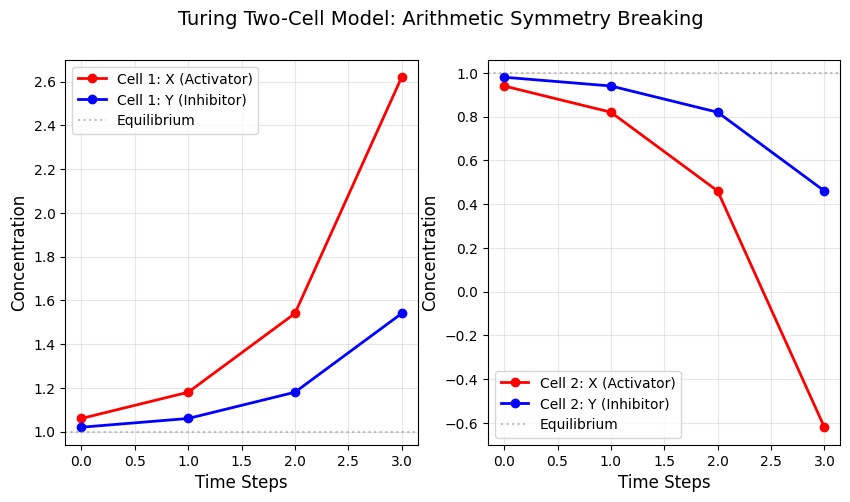

In [28]:
import matplotlib.pyplot as plt

# 图灵两细胞模型的简单算术模拟 (1952 论文第四章逻辑)
# --- 系统参数 (完全取自图灵论文第4节) ---
# 扩散速率
DX = 0.5
DY = 4.5

# 初始浓度 (均衡点 1.0 附近的微小扰动)
# 细胞 1: 略高, 细胞 2: 略低
epsilon = 0.02
x1, y1 = 1 + 3*epsilon, 1 + epsilon
x2, y2 = 1 - 3*epsilon, 1 - epsilon

# 步长与总步数
# dt=1 时对应图灵在文中进行的瞬时变化步长
dt = 1
total_steps = 3

# 记录历史数据用于绘图
history = {
    'steps': [0],
    'x1': [x1], 'y1': [y1],
    'x2': [x2], 'y2': [y2]
}

print(f"Simulation Start: Initial X1={x1}, X2={x2} (Diff: {x1-x2:.2f})")

for i in range(1, total_steps + 1):
    # 1. 计算每个细胞的局部化学反应速率
    # 公式: dX = 5X - 6Y + 1, dY = 6X - 7Y + 1
    rx1 = 5*x1 - 6*y1 + 1
    ry1 = 6*x1 - 7*y1 + 1
    
    rx2 = 5*x2 - 6*y2 + 1
    ry2 = 6*x2 - 7*y2 + 1
    
    # 2. 计算细胞间的扩散
    # 公式: 扩散量 = D * (邻居 - 自身)
    dfx1 = DX * (x2 - x1)
    dfy1 = DY * (y2 - y1)
    
    dfx2 = DX * (x1 - x2)
    dfy2 = DY * (y1 - y2)
    
    # 3. 更新浓度 (纯算术步进)
    # 新浓度 = 旧浓度 + (反应 + 扩散) * dt
    x1 += (rx1 + dfx1) * dt
    y1 += (ry1 + dfy1) * dt
    x2 += (rx2 + dfx2) * dt
    y2 += (ry2 + dfy2) * dt
    
    # 记录数据
    history['steps'].append(i * dt)
    history['x1'].append(x1)
    history['y1'].append(y1)
    history['x2'].append(x2)
    history['y2'].append(y2)

# --- Jupyter Notebook 可视化部分 (English Content) ---
fig, axs = plt.subplot_mosaic(
    [["Cell 1", "Cell 2"]], 
    figsize=(10, 5)
)

# 绘制激活剂 X 的浓度演化
for cell, ax in axs.items(): 
    cell_num = cell.split()[-1]
    ax.plot(history['steps'], history[f'x{cell_num}'], 'r-o', label=f'{cell}: X (Activator)', linewidth=2)
    ax.plot(history['steps'], history[f'y{cell_num}'], 'b-o', label=f'{cell}: Y (Inhibitor)', linewidth=2)

    # 绘制参考线
    ax.axhline(1.0, color='gray', linestyle=':', alpha=0.5, label='Equilibrium')
    ax.grid(True, alpha=0.3)
    ax.set_xlabel("Time Steps", fontsize=12)
    ax.set_ylabel("Concentration", fontsize=12)
    ax.legend()

fig.suptitle("Turing Two-Cell Model: Arithmetic Symmetry Breaking", fontsize=14)

print(f"Simulation End: Final X1={x1:.4f}, X2={x2:.4f} (Diff expanded to: {x1-x2:.2f})")


In [16]:
t


array([0., 1.])

# 8. TYPES OF ASYMPTOTIC BEHAVIOUR IN THE RING AFTER A LAPSE OF TIME


## Plot out the Root Locus
Turing's original plot on Root Locus was not immediately obvious to me. So I decided to plot out the curve on Python to see how we get there. The root equation is shown below. With U changing, the root will change accordingly, drawing a "trace", which is known as the "root locus". 

$$(p-I)^2 + (0.5 + 1.5*U)*(p-I) + 0.5*(U-0.5)^2 = 0$$

Root Locus = 根轨迹

In [67]:
# Calculate the root locus of p-I as U changes
# (p-I)^2 + (0.5 + 1.5*U)*(p-I) + 0.5*(U-0.5)^2 = 0

# Calculate continuous U
def calculate_roots(U):
    beta = 0.5 + 1.5 * U
    gamma = 0.5 * (U - 0.5)**2
    discriminant = beta**2 - 4 * gamma
    
    p_minus_I_1 = np.zeros_like(U, dtype=complex)
    p_minus_I_2 = np.zeros_like(U, dtype=complex)
    
    p_minus_I_1 = (-beta + np.sqrt(discriminant + 0j)) / 2
    p_minus_I_2 = (-beta - np.sqrt(discriminant + 0j)) / 2
    
    return p_minus_I_1, p_minus_I_2, discriminant



In [68]:
# Plot out a continuous example (as in Turing's continuous case)
U = np.linspace(0, 1, 20000)
p1, p2, disc = calculate_roots(U)

real_mask = disc >= 0
comp_mask = ~real_mask


# Also plot out a discrete example (as in Turing's 20 cell case)
U_discrete = np.linspace(0,1, 21)
U_discrete

p1_discrete, _, disc_discrete = calculate_roots(U_discrete)

real_mask_discrete = disc_discrete >= 0
comp_mask_discrete = ~real_mask_discrete

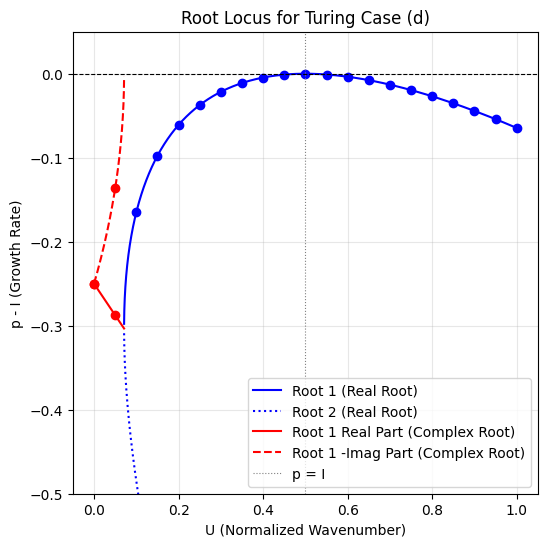

In [74]:
plt.figure(figsize=(6, 6))

# Plot out Continuous Root Locus
plt.plot(U[real_mask], p1[real_mask].real, 'b-', label='Root 1 (Real Root)')
plt.plot(U[real_mask], p2[real_mask].real, 'b:', label='Root 2 (Real Root)')

plt.plot(U[comp_mask], p1[comp_mask].real, 'r-', label='Root 1 Real Part (Complex Root)')
plt.plot(U[comp_mask], -p1[comp_mask].imag, 'r--', label='Root 1 -Imag Part (Complex Root)')

# Plot out Discrete Root Locus of the main root
plt.plot(U_discrete[real_mask_discrete], p1_discrete[real_mask_discrete].real, 'bo')
plt.plot(U_discrete[comp_mask_discrete], p1_discrete[comp_mask_discrete].real, 'ro')
plt.plot(U_discrete[comp_mask_discrete], -p1_discrete[comp_mask_discrete].imag, 'ro')

# plt.plot(U[comp_mask], p2[comp_mask].real, 'r--')

plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0.5, color='gray', linewidth=0.8, linestyle=':', label='p = I')

plt.xlabel('U (Normalized Wavenumber)')
plt.ylabel('p - I (Growth Rate)')
plt.title('Root Locus for Turing Case (d)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim([-0.5, 0.05])

plt.savefig('./turing_root_locus_reproduction.png')